In [1]:
from datetime import datetime
def getTimeDifference(postCreationDate, linkCreationDate):
    fmt = '%Y-%m-%d %H:%M:%S'
    tstamp1 = datetime.strptime(postCreationDate, fmt)
    tstamp2 = datetime.strptime(linkCreationDate, fmt)
    if tstamp1 > tstamp2:
        td = tstamp1 - tstamp2
    else:
        td = tstamp2 - tstamp1
    td_mins = int(round(td.total_seconds() / 60))
    return td_mins

In [ ]:
import re
from urlextract import URLExtract 
import pandas as pd
import numpy as np

#postLinks = pd.read_csv("../example/PostLinks.csv")
df = pd.DataFrame()
#postsIterator = pd.read_csv("../example/PostsTimeAnalysis.csv", chunksize=500000)

one_day = {}
one_to_three_days = {}
three_to_seven_days = {}
seven_days_to_two_weeks = {}
more_than_one_month = {}

totalCount = 0


monthDict={'01':'Jan', '02':'Feb', '03':'Mar', '04':'Apr', '05':'May', '06':'Jun', '07':'Jul', '08':'Aug', '09':'Sep', '10':'Oct', '11':'Nov', '12':'Dec'}

for i in range(1,3):
    for posts in pd.read_csv("../example/PostsTimeAnalysis"+str(i)+".csv", chunksize=1000000):
        questions = posts[posts['PostTypeId'] == 1]
        totalCount = totalCount + len(questions)
        answers = posts[posts['PostTypeId'] == 2]
        for i in questions.index:
            postId = questions['Id'][i]
            postCreationDate = questions['CreationDate'][i].replace("T", " ").split(".")[0]
            postLinksFiltered = answers[answers['ParentId'] == postId]
            for j in postLinksFiltered.index:
                postLinkCreationDate = postLinksFiltered['CreationDate'][j].replace("T", " ").split(".")[0]
                timeDiff = getTimeDifference(postCreationDate, postLinkCreationDate)

                month = monthDict[questions['CreationDate'][i][5:7]]
                year = questions['CreationDate'][i][:4]
                key = str(month) + "-" + str(year)

                if(timeDiff <= 1440):
                    if (key in one_day.keys()): 
                        upCount = one_day[key] + 1
                        one_day.update({key: upCount})
                    else:
                        one_day[key] = 1
                elif(timeDiff > 1440 and timeDiff <= 4320):
                    if (key in one_to_three_days.keys()): 
                        upCount = one_to_three_days[key] + 1
                        one_to_three_days.update({key: upCount})
                    else:
                        one_to_three_days[key] = 1
                elif(timeDiff > 4320 and timeDiff <= 10080):
                    if (key in three_to_seven_days.keys()): 
                        upCount = three_to_seven_days[key] + 1
                        three_to_seven_days.update({key: upCount})
                    else:
                        three_to_seven_days[key] = 1
                elif(timeDiff > 10080 and timeDiff <= 20160):
                    if (key in seven_days_to_two_weeks.keys()): 
                        upCount = seven_days_to_two_weeks[key] + 1
                        seven_days_to_two_weeks.update({key: upCount})
                    else:
                        seven_days_to_two_weeks[key] = 1
                elif(timeDiff > 40320):
                    if (key in more_than_one_month.keys()): 
                        upCount = more_than_one_month[key] + 1
                        more_than_one_month.update({key: upCount})
                    else:
                        more_than_one_month[key] = 1
    print('Batch Completed')

print('Processed all batches!')

In [13]:
print(len(one_day))
print(len(one_to_three_days))
print(len(three_to_seven_days))
print(len(seven_days_to_two_weeks))
print(len(more_than_one_month))

73
73
73
73
73


In [4]:
one_to_three_days['Jul-2008'] = 0

In [5]:
del one_day['Jul-2008']
del three_to_seven_days['Jul-2008']
del seven_days_to_two_weeks['Jul-2008']
del more_than_one_month['Jul-2008']

In [6]:
def getPercentage(dictToUpdate):
    for key, value in dictToUpdate.items():
        upCount = (value / totalCount) * 100
        dictToUpdate.update({key: upCount})
    return dictToUpdate

one_day = getPercentage(one_day)
one_to_three_days = getPercentage(one_to_three_days)
three_to_seven_days = getPercentage(three_to_seven_days)
seven_days_to_two_weeks = getPercentage(seven_days_to_two_weeks)
more_than_one_month = getPercentage(more_than_one_month)

In [16]:
for key,value in one_day.items():
    if key not in more_than_one_month.keys():
        more_than_one_month[key] = 0
    else:
        continue

In [6]:
from IPython.display import display

display(df)

,PostId,Title,PostCreationDate,RelatedPostId,LinkCreationDate,diff
0,48046386,Angular/Chart.js error: Failed to create chart...,2018-01-01 00:02:28,41280857,2018-01-01T00:08:34.567,6
1,48046386,Angular/Chart.js error: Failed to create chart...,2018-01-01 00:02:28,46328575,2018-01-01T00:35:29.077,33
2,48046391,Removing blank lines in csv output on Windows ...,2018-01-01 00:03:50,45908465,2018-01-01T00:03:50.553,0
3,48046399,Observablecollection from Query,2018-01-01 00:05:47,47984570,2018-01-01T00:16:18.033,11
4,48046437,How to use dependency injection with inheritan...,2018-01-01 00:15:41,43680174,2018-01-01T21:26:57.467,1271
...,...,...,...,...,...,...
72934,48796930,Assign local array's contents to global static...,2018-02-14 21:57:34,45656162,2018-02-14T22:01:47.890,4
72935,48796933,Issue with django/postgresql when django start...,2018-02-14 21:57:49,39855652,2018-02-14T23:04:49.930,67
72936,48796943,Leverage browser caching - Firebase/Angular 5,2018-02-14 21:58:45,40375694,2018-02-14T21:58:45.007,0
72937,48796971,Java how to pass JSON object over a Socket,2018-02-14 22:00:57,19489320,2019-06-30T07:08:09.057,720547


No handles with labels found to put in legend.


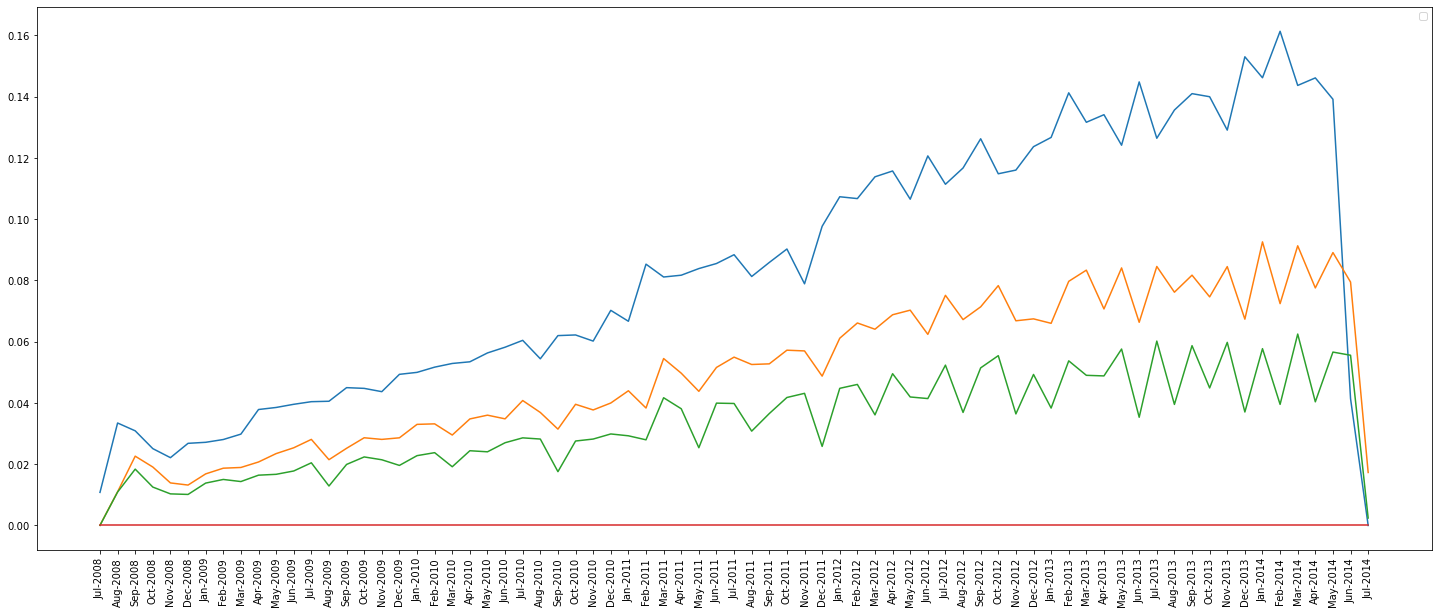

In [14]:
#Logic to plot the graph
import matplotlib.pyplot as plt
keys = one_day.keys()
plt.figure(figsize=(25, 10))
plt.xticks(rotation=90)

#plt.plot(keys, one_day.values())
plt.plot(keys, one_to_three_days.values())
plt.plot(keys, three_to_seven_days.values())
plt.plot(keys, seven_days_to_two_weeks.values())
plt.plot(keys, more_than_one_month.values())

#plt.plot(keys, closedVotesTotalCount.values(), label='% of closed questions')
plt.legend(loc = 'best')